In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import requests
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import (LinearRegression, HuberRegressor)
import key

#This is the api key
api = key.api

In [2]:
df = pd.read_csv("movie_data_2000_2019.csv")

In [3]:
#want to compare budget and revenue
#first need to clean data
#eliminate rows with 0 budget or 0 revenue showing that no data is available
df.drop(df[df['budget'] == 0].index, inplace = True)
df.drop(df[df['revenue'] == 0].index, inplace = True)

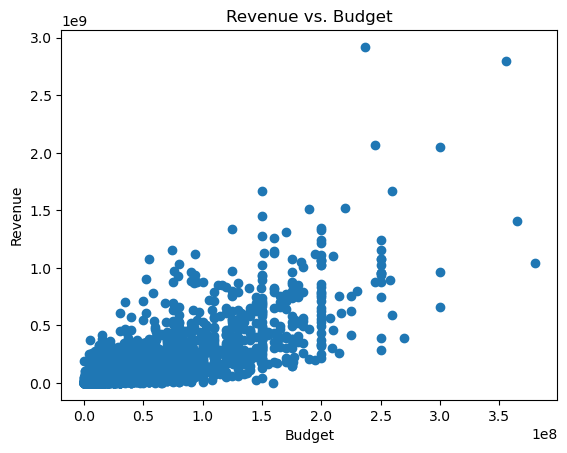

In [4]:
#Lets plot a scatter plot of budget and revenue
#we expect to see a linear relation here visually
fig = plt.figure("Figure 1");
plt.scatter(df.budget,df.revenue)
plt.xscale("linear");
plt.yscale("linear")
plt.xlabel("Budget");
plt.ylabel("Revenue");
plt.title("Revenue vs. Budget");

In [5]:
#From this we can see a vague linear relationship but it is difficult
#to determine exactly what it is

# We can perform a linear regression to fit to the data and see this relation


In [6]:
#create the model
x = df.budget.to_numpy().reshape((-1,1));
y = df.revenue;
model = LinearRegression(fit_intercept=False).fit(x,y);

#print the coefficient score
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

coefficient of determination: 0.5791188785052481
intercept: 0.0
slope: [3.19188148]


In [7]:
linearEstimate = model.predict(x);
y_pred = model.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[3.28763793e+08 2.87269333e+07 2.39391111e+08 ... 9.25645630e+06
 1.59594074e+07 6.70295111e+06]


In [8]:
#we can use huber regression to ignore outliers
huber = HuberRegressor().fit(x,y)
huber_pred = huber.predict(x)


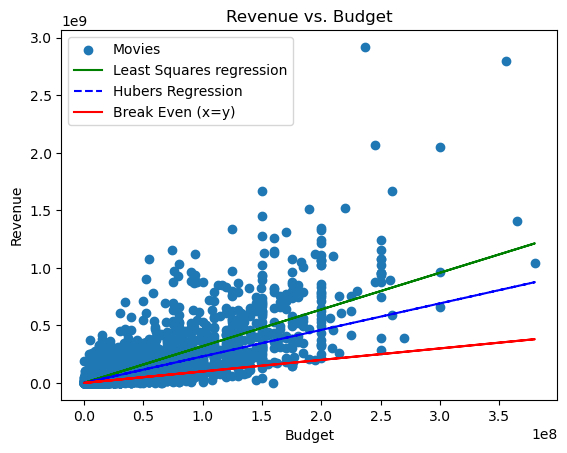

In [9]:
fig = plt.figure("Figure 1");
plt.scatter(df.budget,df.revenue)
plt.plot(x,linearEstimate,'g-')
plt.plot(x,huber_pred,'b--')
plt.plot(x,x,'r-')
plt.xscale("linear");
plt.yscale("linear")
plt.xlabel("Budget");
plt.ylabel("Revenue");
plt.title("Revenue vs. Budget");
plt.legend(["Movies","Least Squares regression","Hubers Regression","Break Even (x=y)"])

In [10]:
#Here we can see a clear relation between the Budget and Revenue
#however, these results may be skewed due to outliers
# we can use a more robust method to develop a better graph

#the blue line denotes the huber regression and has a smaller slope because it
#doesn't value the outliers as much which pulled the slope of the linear regression


In [11]:
#now perform feature selection to determine most important
#features with respect to revenue
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [21]:
#we have a date feature but I want to see if the year or month
#released have an impact on the revenue
df2 = pd.DataFrame(df)
df2["release_date"] = pd.to_datetime(df2["release_date"])
df2["year"] = pd.DatetimeIndex(df2['release_date']).year
df2["month"] = pd.DatetimeIndex(df2['release_date']).month

In [23]:
#split data into training and testing set

y = df2["revenue"]
x = df2.drop(columns=["title","revenue","release_date"])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)



In [36]:
#Create a pipeline to perform lasso regression
#Create a GridSearch instance to optimize alpha
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])



In [37]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [38]:
importance = np.abs(coefficients)
importance

array([8.77478540e+07, 1.03791753e+08, 4.87163371e+06, 2.53101805e+06,
       2.74290365e+06, 5.52699107e+06, 6.06491230e+06, 7.78279124e+06,
       2.36818615e+06, 4.41551088e+06, 5.09725798e+06, 4.96902473e+06,
       3.26029364e+06, 5.30335574e+06, 5.94139873e+06, 3.16343941e+06,
       2.92025605e+06, 4.05043789e+06, 2.74765888e+06, 1.44645104e+07,
       2.49089070e+06, 1.06505841e+06, 4.65535872e+06, 6.01840815e+06,
       5.74676446e+03, 2.36703132e+06])